# DBSCAN - Density-based spatial clustering of applications with noise

DBSCAN is one of the most common data clustering algorithms, developed in 1996 by Martin Ester, Hans-Peter Kriegel, Jörg Sander and Xiaowei Xu. It is a density-based clustering non-parametric algorithm; it groups together points with many nearby neighbours and marks points that lie in low-density regions as outliers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%pwd
#%cd 'drive'
#%cd 'My Drive'
#%cd 'MLResearchProject'
#%cd 'Data_Sets'

/content/drive
/content/drive/My Drive
/content/drive/.shortcut-targets-by-id/1vm2aLzdpci8cKMrtS3X1S57oTdxizmWG/MLResearchProject
/content/drive/.shortcut-targets-by-id/1vm2aLzdpci8cKMrtS3X1S57oTdxizmWG/MLResearchProject/Data_Sets


In [ ]:
import csv
import pandas as pd
import numpy as np

filename='Questions.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf = pdf.drop(columns=['Answer 1', 'Answer 2', 'Answer 3', 'Answer 4', 'Answer 5', 'Author'], axis=1)
pdf


,Question,Explanation
0,The runtime for the following code fragment is...,NaN
1,"Given the binary search algorithm, as taught i...",NaN
2,An algorithm has time complexity . Using the D...,Solve for the roots of |T(N)|=4N^2. The roots ...
3,Which one of the following sorting algorithms ...,NaN
4,Given the tree: a / \ b c / \ / \ e f g hWhat ...,For the in order traversal we start from the r...
...,...,...
1073,2 functions refer to the run-times of 2 algori...,this is the definition forg(n) = O(f(n)) as se...
1074,Which of the following sorts has the quickest ...,for n unsorted objects:Insertion sort has comp...
1075,You plan to store data in a closed hash table ...,"B is correct. 14 goes in slot 6, as 14-6=8. Th..."
1076,Which of the following is the correct definiti...,O(n�) is the lower bound of the function; so f...


In [ ]:
# Importing packages
import re
import os
import sys
import string
import codecs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# write demo on sklearn!!!!!!!!!!
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from scipy.spatial.distance import cosine
from scipy.stats.stats import pearsonr

# For text pre-processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

#### Text Preprocessing


In [ ]:
# Removing punctuation
pdf['Questions_P1'] = pdf['Question'].map(lambda x: re.sub('[,\.!?:></="-;]', ' ', x))

# Tokenizing
tokenizer = RegexpTokenizer(r'\w+')
pdf['Questions_P2'] = pdf['Questions_P1'].apply(lambda x: tokenizer.tokenize(x.lower()))

# Stop words removal
nltk.download('stopwords')
stop = stopwords.words('english')
stop.append('nbsp')
pdf['Questions_P2'] = pdf['Questions_P2'].apply(lambda x: [item for item in x if item not in stop])

# Stemming using Porter
#ps = PorterStemmer()
#def word_stemmer(text):
#    stem_text = ' '.join([ps.stem(i) for i in text])
#    return stem_text

#pdf['Questions_P3'] = pdf['Questions_P2'].apply(lambda x: word_stemmer(x))

# Lemmatizing
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def word_lemmatizer(text):
    stem_text = ' '.join([lemmatizer.lemmatize(i) for i in text])
    return stem_text

pdf['Questions_P3'] = pdf['Questions_P2'].apply(lambda x: word_lemmatizer(x))

# Removing short words
pdf['Questions_P'] = pdf['Questions_P3'].map(lambda x: re.sub(r'\b\w{1,2}\b', '', x))
pdf['Questions_P'].head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


0    runtime following code fragment     int  int  ...
1    given binary search algorithm taught lecture a...
2    algorithm time complexity using definition big...
3    one following sorting algorithm quickest almos...
4                given tree      hwhat order traversal
Name: Questions_P, dtype: object

In [ ]:
# Filter and pre-process each essay to get a processed list of sentences
nltk.download('punkt')

essay1_sents = pdf['Questions_P']
text_list1 = [re.sub("[,.!?\;\”\“\’-]", ' ', sentence) for sentence in essay1_sents] # Cleaned list of sentences
names1 = range(len(text_list1)) # Index number of each sentence

print(text_list1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['runtime following code fragment     int  int    int      system println', 'given binary search algorithm taught lecture array followingnumbers first last index many iteration algorithm need find element', 'algorithm time complexity using definition big  given week lecture slide fix  assuming lowest possible value  definition hold', 'one following sorting algorithm quickest almost sorted array', 'given tree      hwhat order traversal', 'consider created adjacency matrix directed graph would able determine matrix created multiplying  would able determine', 'time complexity dijkstra algorithm without min priority queue', 'linked list time complexity insert  remove given reference previous element', 'santa one many beer flying sleigh back north pole police pull police ask hiseasa part fcl commercial pilot license cpl realises left one remaining gift box gift box need find labelled sa

#### DBSCAN model
Note: Might need Count vectorizer before tf-idf here.

In [ ]:
# Build DBSCAN model with Tf-idf vectorizer
tfidfvec = TfidfVectorizer(ngram_range=(1,5), min_df = 0.1, max_df = 1.0, decode_error = "ignore")

In [ ]:
~# Run DBSCAN with essay1
X1 = tfidfvec.fit_transform(text_list1).toarray()
db1 = DBSCAN(eps=0.1, min_samples=20).fit(X1)
core_samples_mask = np.zeros_like(db1.labels_, dtype=bool)
core_samples_mask[db1.core_sample_indices_] = True
labels1 = db1.labels_
n_clusters_ = len(set(labels1)) - (1 if -1 in labels1 else 0) # Number of clusters in labels
print(labels1)
print()

clusters1 = {}
number1 = 0
for c, i in enumerate(labels1):
    if i == -1:
        continue
    elif i in clusters1:
        clusters1[i].append( text_list1[c] )
        #print(pdf.at[c,'Question'])
        number1 += 1
    else:
        clusters1[i] = [text_list1[c]]
for c in clusters1:
    print(clusters1[c])
    print()

print(number1)

[ 0 -1 -1 ... -1 -1  0]

['runtime following code fragment     int  int    int      system println', 'given functionsf     nlognh  nhint least exactly apply following true', 'following rule big false', 'following function stack', 'consider function   log    log    log    following statement true', 'one following cryptographic tool', 'following statement true', 'consider following statement following function one following statement correct', 'following desirable runtime  fastest runtime large ', 'consider following graph adjacency matrix adjacency matrix multiplied  resultant matrix represent', 'following protocol deprecated', 'consider following function         nselect true statement', 'following valid advice hashing password', 'following statement false', 'runtime following code int  system println hello int    int    int     system println ', 'following graph representation', 'following pre image resistance', 'abstract data type described coordinated group ____ ____ ____ used solve

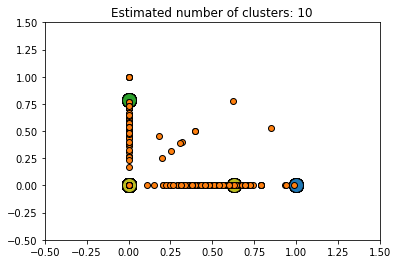

In [ ]:
# Plotting Tool Source: http://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html
unique_labels = set(labels1)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    class_member_mask = (labels1 == k)
    xy = X1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markeredgecolor='k', markersize=14)
    xy = X1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markeredgecolor='k', markersize=6)
    
plt.axis([-0.5, 1.5, -0.5, 1.5])
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [ ]:
from sklearn.datasets import make_blobs

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

In [ ]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

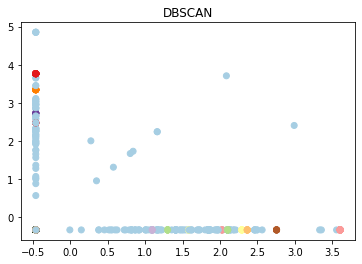

In [ ]:
X1 = tfidfvec.fit_transform(text_list1).toarray()
#X1 = 
dbscan(X1, 0.4, 5)